In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from time import time


df = pd.read_csv("earlyColorData_YSE.csv", index_col=0)
df.head()

,r-i,g-r,afterExp
0,-0.727116,0.028008,-0.00625
1,-0.734804,0.039352,0.99375
2,-0.691128,0.023258,1.99375
3,-0.555759,-0.029373,2.99375
4,-0.388229,-0.097996,3.99375


In [2]:
#Creating a third column with boolean values for whether observation was within n days
def phasecut(n):
    df["before" + str(n) + "Days"] = [1 if row[1][2] < n else 0 for row in df.iterrows()]

In [3]:
#Decision Boundary Function


"""clf : classifier
X_test : Features
y_test : labels
name : classifier name for graoh
label : labels for x and y axis
i : for iterating multiple graphs in a single subplot"""
def Plotting(clf, X_test, y_test, name, label, i):
    
    x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
    y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
    #meshgrid creates a rectangular grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    #ravel turns the arrays to a 1-D array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    countour = ax[0][i].contourf(xx, yy, Z)
    scatter = ax[0][i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap="viridis")
    ax[0][i].set_xlabel(df.columns[0])
    ax[0][i].set_xlim(-1.5, 0.5)
    ax[0][i].set_ylabel(df.columns[1])
    ax[0][i].set_ylim(-0.6, 1)
    ax[0][i].set_title(name)
    ax[0][i].legend(handles=scatter.legend_elements()[0], labels=label)

    plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", ax=ax[1][i],
                          display_labels=label, normalize='true')
    

In [4]:
#Decision Boundary Function

"""clf : classifier
X_test : Features
y_test : labels
name : classifier name for graoh
label : labels for x and y axis"""
def PlotDecisionBoundary(clf, X_test, y_test, name, label):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
    
    print(X_train.shape)
    start_time = time()
    clf.predict(X_train)
    elapsed_time = time() - start_time
    print("Time taken by " + name + " :" + str(elapsed_time))
    
    x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
    y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
    #meshgrid creates a rectangular grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    #ravel turns the arrays to a 1-D array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    countour = ax[0].contourf(xx, yy, Z)
    scatter = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap="viridis")
    ax[0].set_xlabel(df.columns[0])
    ax[0].set_xlim(-1.5, 0.5)
    ax[0].set_ylabel(df.columns[1])
    ax[0].set_ylim(-0.6, 1)
    ax[0].set_title(name)
    ax[0].legend(handles=scatter.legend_elements()[0], labels=label)

    plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", ax=ax[1],
                          display_labels=label, normalize='true')
    
    plt.show()
    

In [5]:
#Splitting and rebalancing dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

day = 3
phasecut(day)

data = df.to_numpy()
X = data[:, 0:2]
y = data[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ros = RandomOverSampler(sampling_strategy=1.0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)
print(y)

(2390, 2) (2390,)
[1. 1. 1. ... 0. 0. 0.]


In [6]:
#apply classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classifiers = ["Neural Net", "Naive Bayes", "SVM RBF"]
label = ["After " + str(day) + " Days", "Before " + str(day) + " Days"]

clf1 = MLPClassifier(max_iter=1000).fit(X_resampled, y_resampled)
clf2 = GaussianNB().fit(X_resampled, y_resampled)
clf3 = SVC(C=1).fit(X_resampled, y_resampled)


(1680, 2)
Time taken by Neural Net :0.0020799636840820312


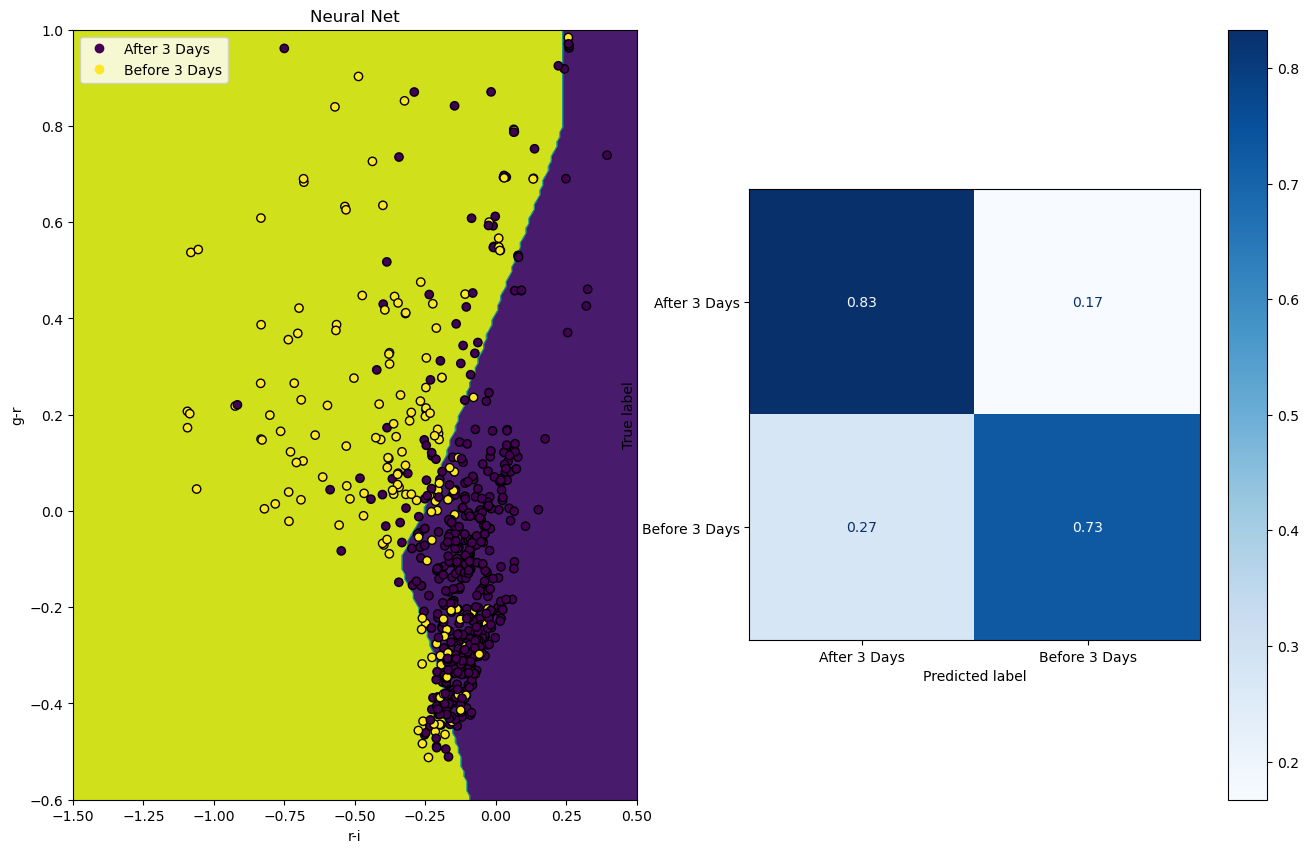

In [7]:
#Neural Net

PlotDecisionBoundary(clf1, X_test, y_test, classifiers[0], label)


(1680, 2)
Time taken by Naive Bayes :0.0004820823669433594


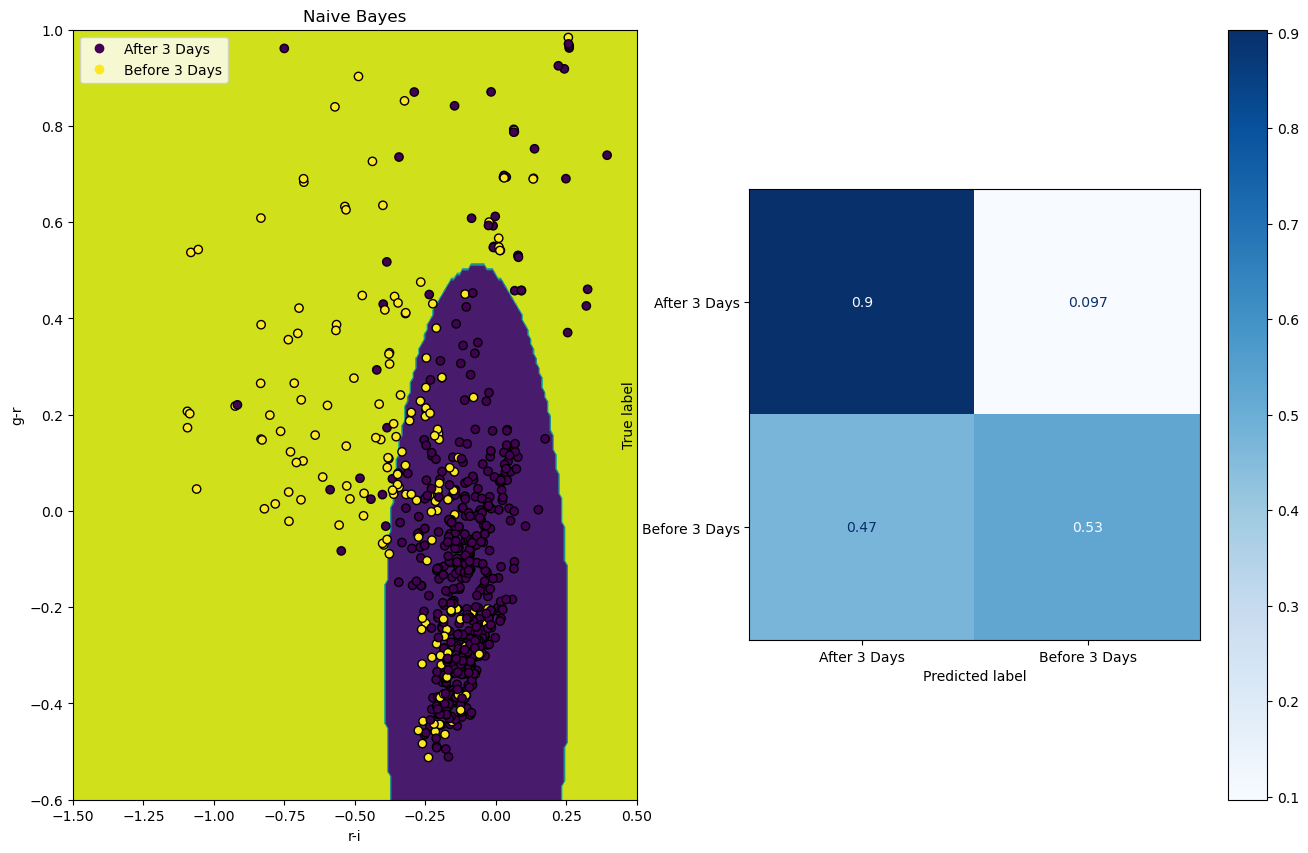

In [8]:
#Naive Bayes

PlotDecisionBoundary(clf2, X_test, y_test, classifiers[1], label)
plt.show()

(1680, 2)
Time taken by SVM RBF :0.20165491104125977


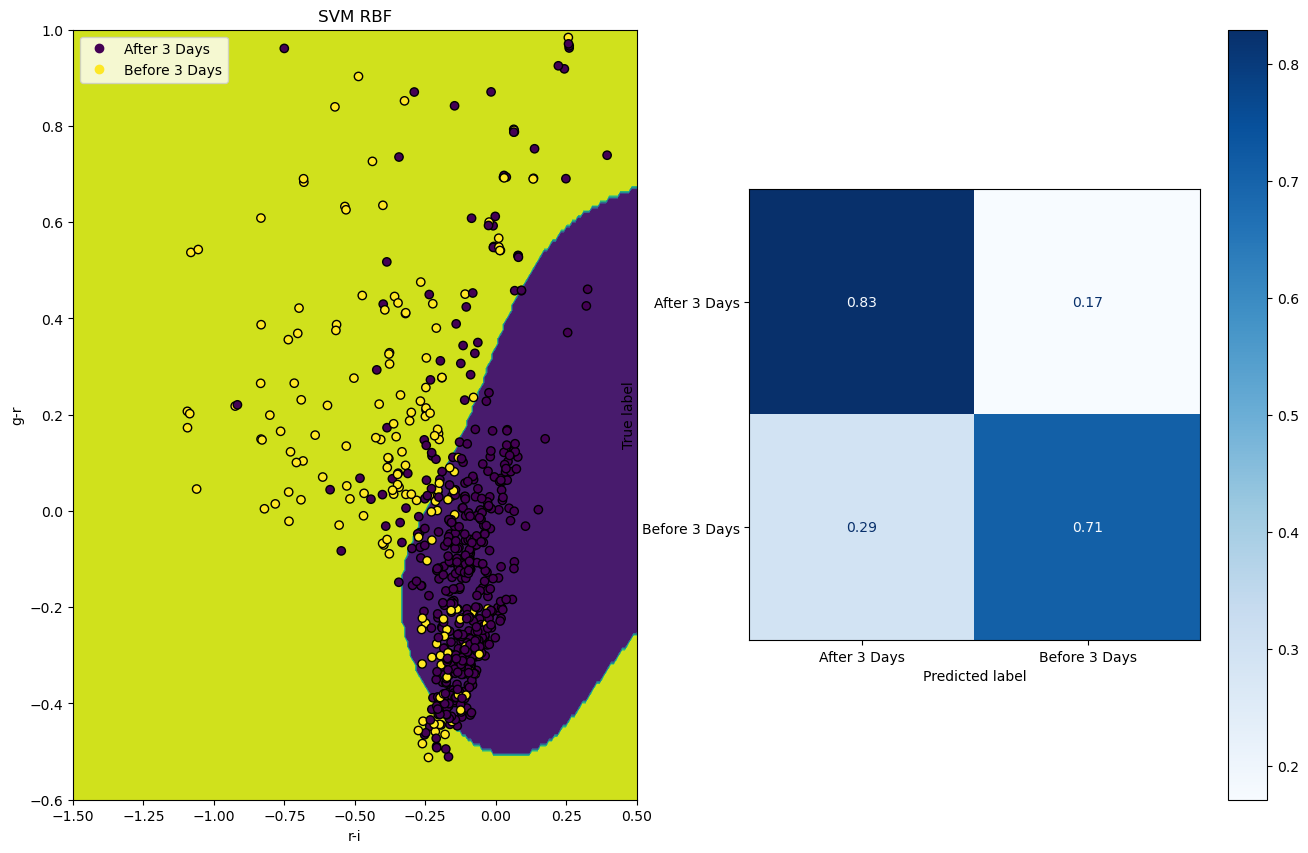

In [9]:
#SVM_RBF
PlotDecisionBoundary(clf3, X_test, y_test, classifiers[2], label)
plt.show()

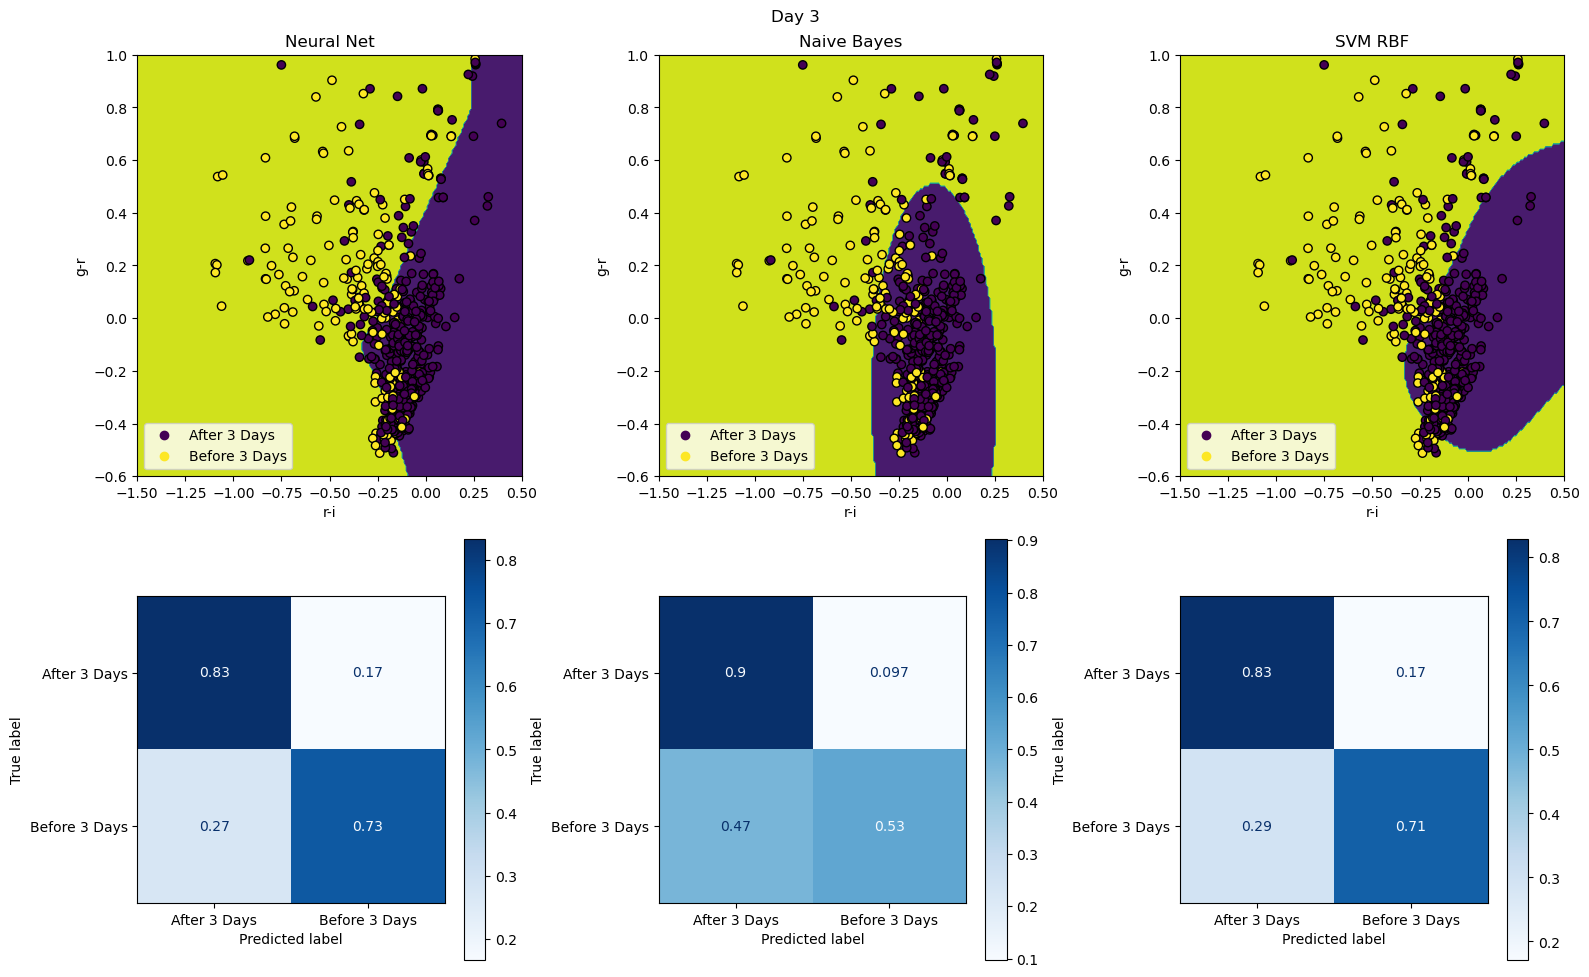

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

clf = [clf1, clf2, clf3]

plt.suptitle("Day " + str(day))
for i in range(3):
    Plotting(clf[i], X_test, y_test, classifiers[i], label, i)

plt.tight_layout()
plt.savefig("Day " + str(day) + " Normalized.jpg")
plt.show()

In [11]:
plt.hist(df["afterExp"])

(array([147., 148., 165., 208., 272., 285., 293., 285., 290., 308.]),
 array([-0.25,  0.55,  1.35,  2.15,  2.95,  3.75,  4.55,  5.35,  6.15,
         6.95,  7.75]),
 <BarContainer object of 10 artists>)

Time taken by Random Forest :0.019567251205444336


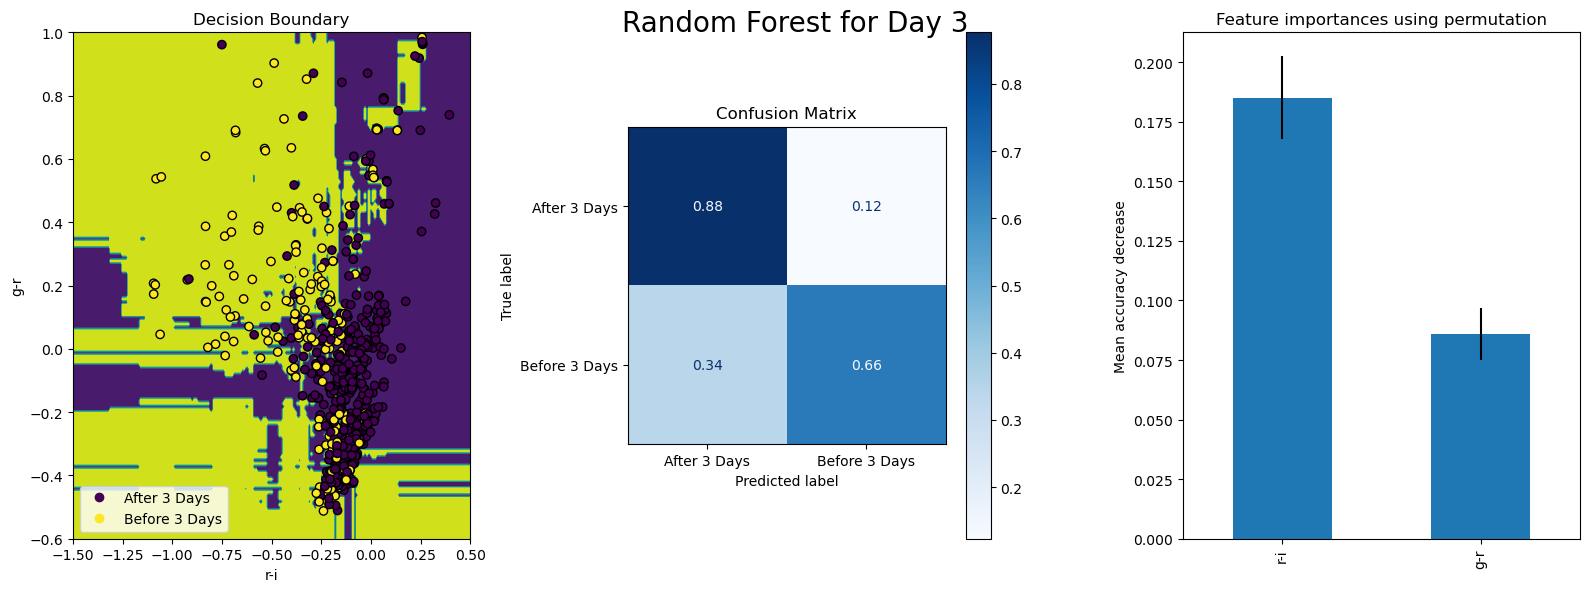

In [14]:
#Implementing RandomForest and feature importance


feature_names = [df.columns[i] for i in range(X.shape[1])]
forest = RandomForestClassifier().fit(X_resampled, y_resampled)

start_time = time()
forest.predict(X_train)
elapsed_time = time() - start_time
print("Time taken by Random Forest :" + str(elapsed_time))

#Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
#meshgrid creates a rectangular grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
#ravel turns the arrays to a 1-D array
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[0].contourf(xx, yy, Z)
scatter = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k")
ax[0].set_xlabel(df.columns[0])
ax[0].set_xlim(-1.5, 0.5)
ax[0].set_ylabel(df.columns[1])
ax[0].set_ylim(-0.6, 1)
ax[0].set_title("Decision Boundary")
ax[0].legend(handles=scatter.legend_elements()[0], labels=label)

plot_confusion_matrix(forest, X_test, y_test, cmap="Blues", ax=ax[1],
                      display_labels=label, normalize='true')
ax[1].set_title("Confusion Matrix")

result = permutation_importance(forest, X_test, y_test, n_repeats=10)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances.plot.bar(yerr=result.importances_std, ax=ax[2])
ax[2].set_title("Feature importances using permutation")
ax[2].set_ylabel("Mean accuracy decrease")
plt.tight_layout()
plt.suptitle("Random Forest for Day " + str(day), fontsize=20)
plt.show()